In [1]:
import os
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
file = 'breast-cancer-wisconsin.data'
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'] #Name each column from a previous exploration of the data
data = pd.read_csv(file,names = names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [3]:
#Preprocess the data
data.replace('?',-99999, inplace=True)
print(data.axes)
data.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [4]:
#Further exploration of the dataset
print(data.iloc[20])
print(data.describe())
data.head(n = 5)

clump_thickness            7
uniform_cell_size          3
uniform_cell_shape         2
marginal_adhesion         10
single_epithelial_size     5
bare_nuclei               10
bland_chromatin            5
normal_nucleoli            4
mitoses                    4
class                      4
Name: 20, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000       

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


/home/bhargava/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bhargava/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bhargava/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/bhargava/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:3

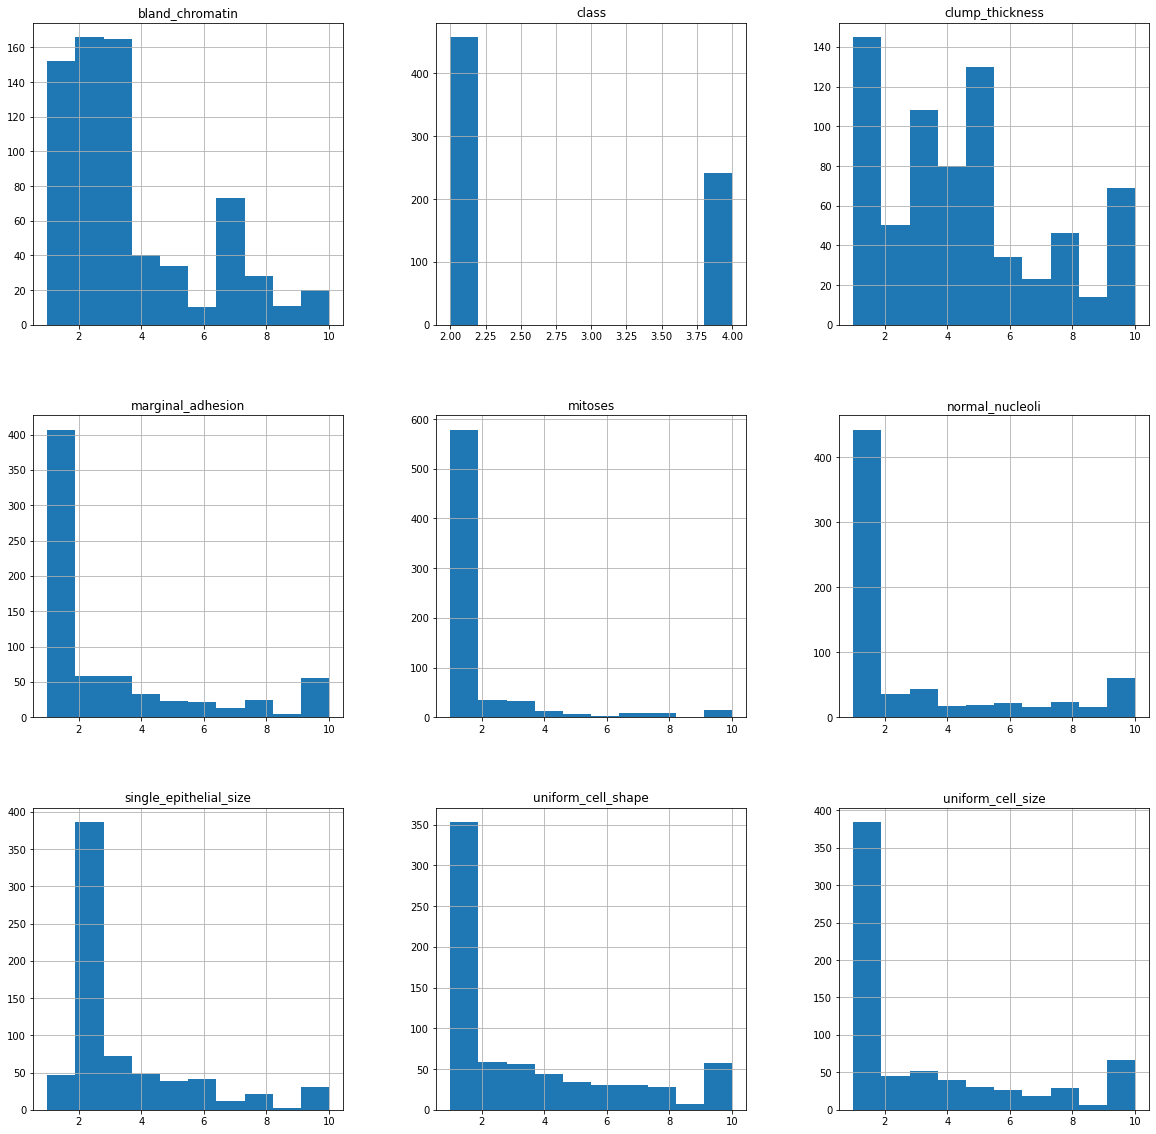

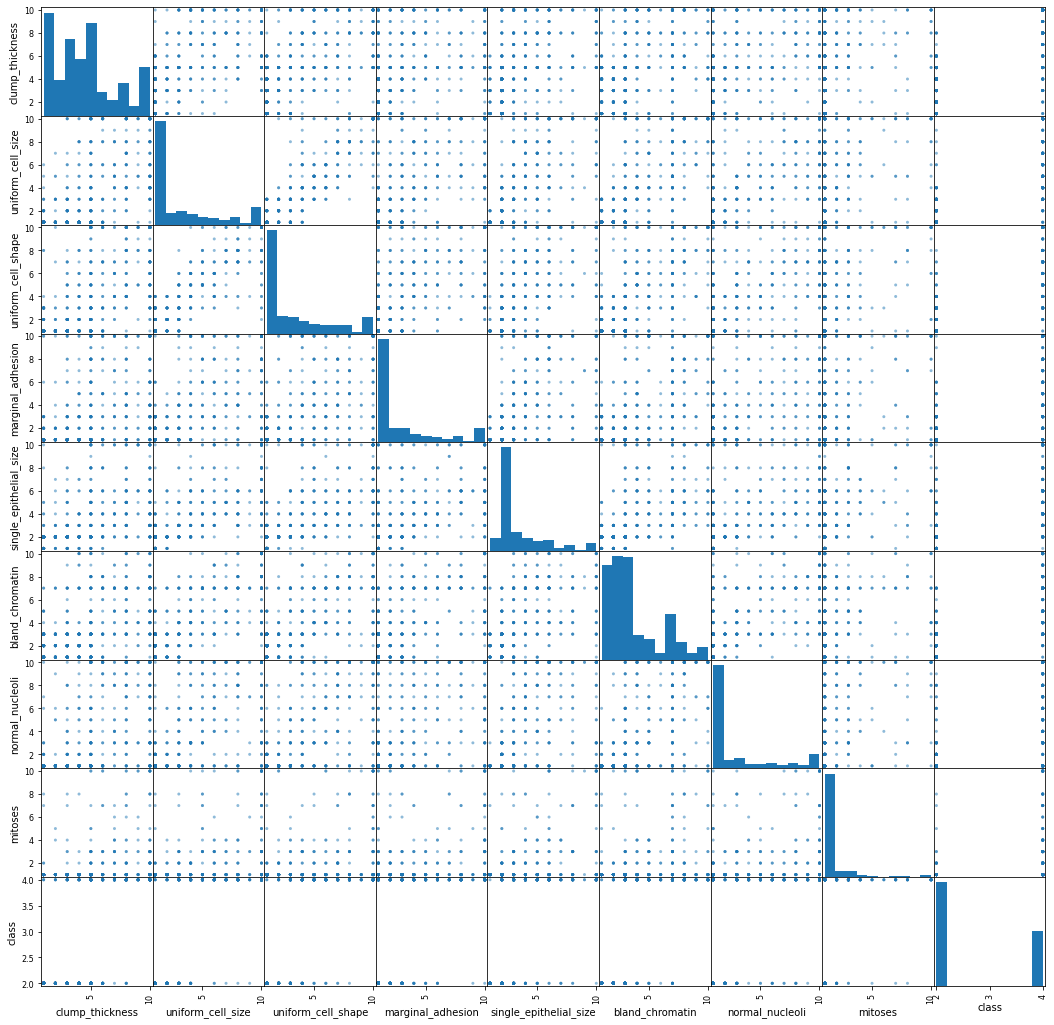

In [5]:
#Plot histograms and confusion matrix
data.hist(figsize = (20,20))
plt.show()
scatter_matrix(data, figsize = (18,18))
plt.show()

In [12]:
#Datasets for training and testing
#Encode labels
def encode(x):
    if x == 2:
        return 0
    else:
        return 1
data['class'] = data['class'].apply(encode)
X = data.drop(['class'],1)
Y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 42)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 82 to 102
Data columns (total 9 columns):
clump_thickness           559 non-null int64
uniform_cell_size         559 non-null int64
uniform_cell_shape        559 non-null int64
marginal_adhesion         559 non-null int64
single_epithelial_size    559 non-null int64
bare_nuclei               559 non-null object
bland_chromatin           559 non-null int64
normal_nucleoli           559 non-null int64
mitoses                   559 non-null int64
dtypes: int64(8), object(1)
memory usage: 43.7+ KB
None


In [13]:
#Choose a few models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import fbeta_score,accuracy_score
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=42, n_jobs=2)
knn = KNeighborsClassifier(n_jobs=2)
lreg = LogisticRegression(random_state=42)
lsvc = LinearSVC(random_state=42)
gdb = GradientBoostingClassifier(random_state=42)
classifiersList = [gnb,dt,rfc,knn,lsvc,lreg,gdb]
classifiersScores = []
classifiersTrainTimes = []

In [14]:
#Train the models
from time import time
print(set(y_train))
def trainPredict(model,sampleSize,x_train,y_train,x_test,y_test):
    '''
    model: The algorithm
    sampleSize: The size of samples to draw from
    x_train: Training dataset
    y_train: Labels 
    x_test: Test set
    y_test: Test labels
    '''
    results = {}
    #Training the model 
    start = time()
    learner = model.fit(x_train[:sampleSize],y_train[:sampleSize])
    end = time()
    results['training_time'] = end - start
    
    #Predictions 
    start = time()
    predictions_test = learner.predict(x_test)
    end = time()
    results['testing_time'] = end - start
    results['acc_train'] = accuracy_score(y_test,learner.predict(x_test))
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    print ("{} trained on {} samples.".format(model.__class__.__name__, sampleSize))
    results['clf_name'] = model.__class__.__name__
    return results

#Create lists to store selected benchmarking results
clf_lscores = []
clf_ltrain_times = []
clf_lnames = []
clf_testAccuracies = []
clf_trainAccuracies = []

for model in classifiersList:
    #Train the various models on the same set of data to compare and choose the best model
    clfResults = trainPredict(model,len(y_train),X_train,y_train,X_test,y_test)
    clf_lscores.append(clfResults['f_test'])
    clf_ltrain_times.append(clfResults['training_time'])
    clf_testAccuracies.append(clfResults['acc_test'])
    clf_trainAccuracies.append(clfResults['acc_train'])
    clf_lnames.append(clfResults['clf_name'].replace('Classifier', ''))
print(clf_lscores)
print(clf_ltrain_times)
print(clf_testAccuracies)
print(clf_lnames)

{0, 1}
GaussianNB trained on 559 samples.
DecisionTreeClassifier trained on 559 samples.
RandomForestClassifier trained on 559 samples.
KNeighborsClassifier trained on 559 samples.
LinearSVC trained on 559 samples.


/home/bhargava/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bhargava/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression trained on 559 samples.
GradientBoostingClassifier trained on 559 samples.
[0.9388646288209607, 0.9216589861751152, 0.9502262443438916, 0.9777777777777777, 0.9555555555555557, 0.9502262443438916, 0.9502262443438916]
[0.0071451663970947266, 0.08161520957946777, 0.46185779571533203, 0.03167247772216797, 0.06786847114562988, 0.18113040924072266, 0.10793828964233398]
[0.9642857142857143, 0.9428571428571428, 0.9642857142857143, 0.9857142857142858, 0.9714285714285714, 0.9642857142857143, 0.9642857142857143]
['GaussianNB', 'DecisionTree', 'RandomForest', 'KNeighbors', 'LinearSVC', 'LogisticRegression', 'GradientBoosting']


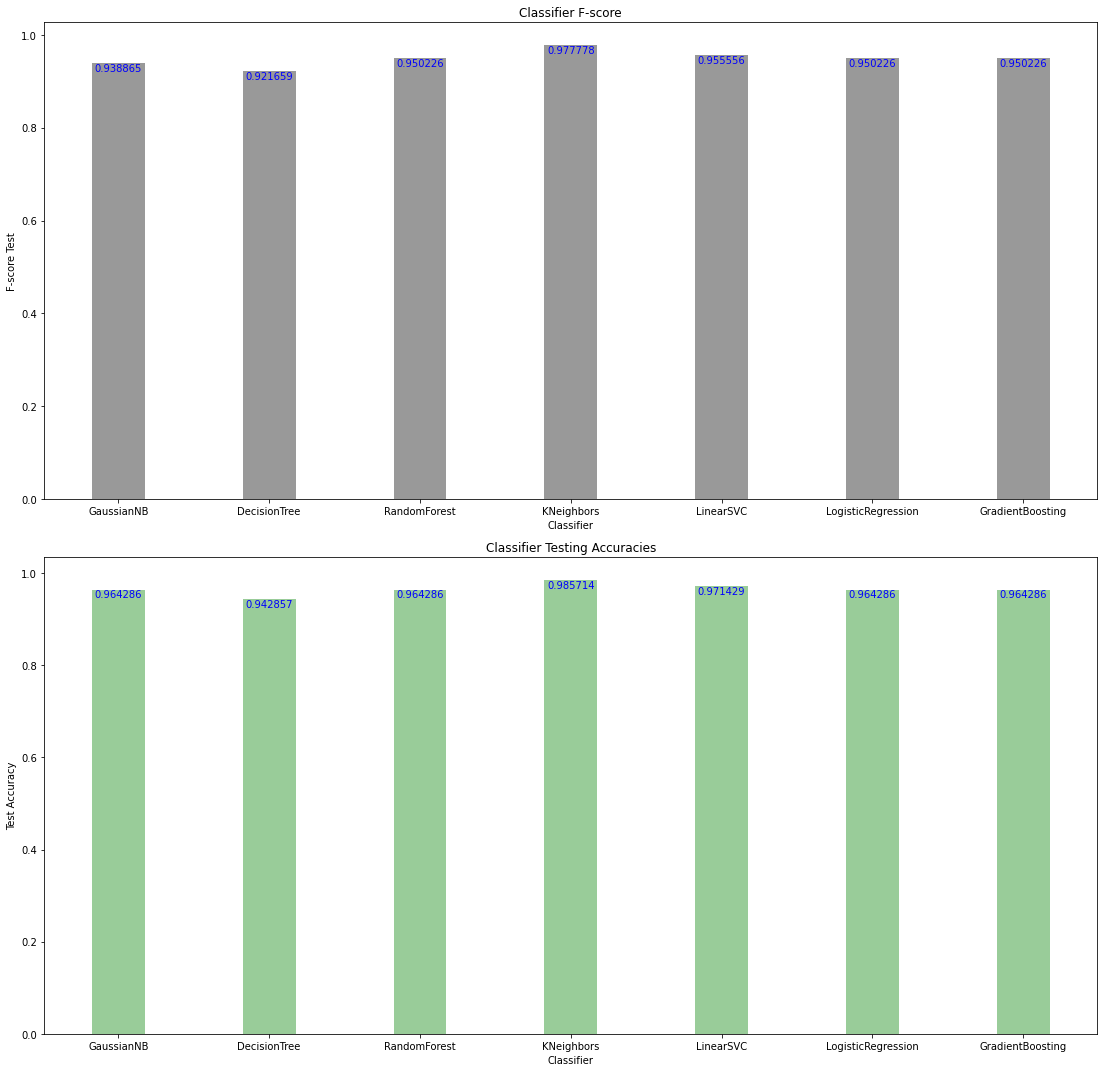

In [15]:
#Plot the results
plt.figure(1,figsize = (45,15))
nGroups = len(clf_lscores)
index = np.arange(nGroups)
barWidth = 0.35
opacity = 0.4
data1 = clf_lscores
data2 = clf_testAccuracies 
plt.subplot(2,3,1)
plt.xlabel('Classifier')
plt.ylabel('F-score Test')
plt.title('Classifier F-score')
plt.xticks(index, clf_lnames)
bar1 = plt.bar(index, data1, barWidth, alpha=opacity, color='k')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.subplot(2,3,4)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Classifier Testing Accuracies')
plt.xticks(index, clf_lnames)
bar2 = plt.bar(index, data2, barWidth, alpha=opacity, color='g')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.tight_layout()
plt.show()

Model can be finetuned to study the effect of various subsets of features.